#  Data Analytics Final Project


---

## Project Title:
***Health and Lifestyle Risk Analysis***

---

## Project Summary:
The objective of this project is to analyze a synthetic health and lifestyle dataset to identify the key factors influencing an individual’s overall health risk.  
This analysis will explore how variables such as **exercise frequency, sleep duration, sugar intake, BMI, smoking, and alcohol habits** affect the likelihood of being classified as *high* or *low* health risk.  
Through data cleaning, exploratory data analysis (EDA), and visualizations, we aim to uncover meaningful lifestyle patterns and provide actionable insights for wellness improvement.

---

##  Dataset Information:
- **Dataset Name:** Synthetic Health & Lifestyle Dataset  
- **Source:** [Kaggle – by Arif Miah](https://www.kaggle.com/datasets/arifmiah/health-and-lifestyle-dataset)   
- **Author:** Arif Miah (Machine Learning Engineer, - Kaggle Expert)
-  License: CC0 (Public Domain)
- **Rows:** 5,000  
- **Columns:** 12  
- **Data Type:** Mixed (Numerical + Categorical)  

---



##  Project Goals:
- Analyze and interpret lifestyle factors influencing overall health risk.

- Explore variables such as Exercise, Sleep, Sugar Intake, BMI, Smoking, and Alcohol habits.

- Perform EDA, statistical summaries, and visualizations to uncover patterns.

- Support preventive health awareness and data-informed lifestyle recommendations.

## Task 1: Dataset Overview & Initial Exploration


---
**Objective:**

Understand the dataset structure, types, and initial characteristics before cleaning or analysis.



---
**Steps Completed**:

- Loaded dataset using Pandas.

- Checked shape: number of rows and columns.

- Viewed first few rows using head().

- Examined data types of each column with info().

- Generated summary statistics for numerical columns using describe().

- Checked number of unique values in each column with nunique().


---
**Outcome**:

- Dataset successfully loaded and explored.

- Identified missing values, duplicates, and inconsistent formatting for cleaning in Task 2.

- Initial understanding of variables ready for detailed analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/DA Final Project/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'

df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape[0], "rows,", df.shape[1], "columns")
df.head()

Mounted at /content/drive
Dataset Loaded Successfully!
Shape of dataset: 5000 rows, 12 columns


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [3]:
# Quick Data Summary
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


,0
age,62
weight,65
height,55
exercise,4
sleep,71
sugar_intake,3
smoking,2
alcohol,2
married,2
profession,8


# Task 2: Data Cleaning & Preprocessing


---


**Objective:**

Prepare the dataset for analysis by handling missing values, correcting data types, creating derived columns, filtering unrealistic values, and generating aggregated summaries for initial insights.

---

**Steps Completed:**

- Checked missing values using isnull().sum().

- Filled missing values:

  - Numeric columns (Age, Weight, Height, Sleep, BMI) filled with mean values.

  - Categorical columns (Exercise, Smoking, Alcohol, Married, Profession, Health Risk, Sugar Intake) cleaned for consistency: stripped spaces, capitalized values.

- Removed duplicate rows using drop_duplicates().

- Corrected data types:

  -  Numeric columns converted to appropriate numeric types.

  - Categorical columns converted to category type.

- Created derived columns:

  - BMI_Category: Underweight, Normal, Overweight, Obese (based on BMI).

  - Sleep_Category: Very Low, Low, Optimal, High (based on Sleep hours).

- Filtered unrealistic values:

      Age between 18–80

      BMI between 10–60

      Sleep between 0–12 hours

- Aggregated Insights:

  - Average BMI by Health Risk: High-risk individuals have higher BMI(28.8) vs Low-risk (22.3).

  - Count of people in each Sleep Category: Most people are in Low (2,150) or Optimal (2,012) sleep categories.

  - Average Sleep Duration by Exercise Frequency: Sleep duration is fairly consistent (7 hours) across exercise levels.

  - Count of people by Profession: Distribution is balanced across professions (e.g., Student 644, Farmer 639, Doctor 630, Office_worker 602).


---


**Outcome:**

- Dataset cleaned, formatted, and ready for detailed EDA.

- Derived columns and aggregated summaries provide initial insights into health patterns and lifestyle factors.

- Established a foundation for data-driven analysis and visualization in Task 3.



In [4]:

# Data Cleaning

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values for numeric columns only
numeric_cols = ['age','weight','height','sleep','bmi']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Remove duplicate rows
df = df.drop_duplicates()

# Correct data types
categorical_cols = ['exercise','smoking','alcohol','married','profession','health_risk','sugar_intake']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Clean categorical columns (strip spaces and capitalize)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Create derived columns
df['BMI_Category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 60],
    labels=['Underweight','Normal','Overweight','Obese']
)

df['Sleep_Category'] = pd.cut(
    df['sleep'],
    bins=[0, 5, 7, 9, 24],
    labels=['Very Low','Low','Optimal','High']
)

# Filter unrealistic values
df = df[(df['age'] >= 18) & (df['age'] <= 80)]
df = df[(df['bmi'] > 10) & (df['bmi'] < 60)]
df = df[(df['sleep'] >= 0) & (df['sleep'] <= 12)]

# Derived column Lifestyle_score_raw
exercise_points = {'None':0, 'Rarely':1, 'Sometimes':2, 'Often':3, 'Daily':4}
sugar_points = {'Low':1, 'Medium':2, 'High':3}
smoking_points = {'Yes':2, 'No':0}
alcohol_points = {'Yes':1, 'No':0}

df['Lifestyle_score_raw'] = (
    df['exercise'].map(exercise_points).fillna(0)
    - df['sugar_intake'].map(sugar_points).fillna(0)
    - df['smoking'].map(smoking_points).fillna(0)
    - df['alcohol'].map(alcohol_points).fillna(0)
)

# Rescale Lifestyle score to 0-10 using min-max scaling
min_score = df['Lifestyle_score_raw'].min()
max_score = df['Lifestyle_score_raw'].max()
df['Lifestyle_score'] = ((df['Lifestyle_score_raw'] - min_score) / (max_score - min_score) * 10).round(1)

df[['exercise','sugar_intake','smoking','alcohol','Lifestyle_score']].head()

#  Aggregated Insights

# Average BMI by Health Risk
avg_bmi_by_risk = df.groupby('health_risk')['bmi'].mean().reset_index()
print(" Average BMI by Health Risk:")
print(avg_bmi_by_risk)

# Count of people in each Sleep Category
sleep_counts = df['Sleep_Category'].value_counts()
print("\n Number of people in each Sleep Category:")
print(sleep_counts)

# Average Sleep Duration by Exercise Frequency
avg_sleep_by_exercise = df.groupby('exercise')['sleep'].mean().reset_index()
print("\n Average Sleep Duration by Exercise Frequency:")
print(avg_sleep_by_exercise)

# Count of people by Profession
profession_counts = df['profession'].value_counts()
print("\n Number of people by Profession:")
print(profession_counts)
df.head()

Missing values:
 age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64
 Average BMI by Health Risk:
  health_risk        bmi
0        High  28.791576
1         Low  22.342252

 Number of people in each Sleep Category:
Sleep_Category
Low         2150
Optimal     2012
Very Low     421
High         417
Name: count, dtype: int64

 Average Sleep Duration by Exercise Frequency:
  exercise     sleep
0     High  7.044500
1      Low  6.964623
2   Medium  6.975365
3     None  7.046703

 Number of people by Profession:
profession
Student          644
Farmer           639
Driver           631
Doctor           630
Artist           626
Engineer         616
Teacher          612
Office_worker    602
Name: count, dtype: int64


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,BMI_Category,Sleep_Category,Lifestyle_score_raw,Lifestyle_score
0,56,67,195,Low,6.1,Medium,Yes,Yes,Yes,Office_worker,17.6,High,Underweight,Low,-5.0,2.0
1,69,76,170,High,6.9,High,No,No,No,Teacher,26.3,High,Overweight,Low,-3.0,6.0
2,46,106,153,High,6.6,Low,Yes,No,No,Artist,45.3,High,Obese,Low,-3.0,6.0
3,32,54,186,Medium,8.5,Medium,No,No,No,Artist,15.6,Low,Underweight,Optimal,-2.0,8.0
4,60,98,195,High,8.0,Low,No,No,Yes,Teacher,25.8,High,Overweight,Optimal,-1.0,10.0


# Task 3: Exploratory Data Analysis (EDA) & Visualizations


---


**Objective:**

The purpose of this task was to perform a comprehensive exploratory data analysis to uncover patterns, trends, and relationships in the health and lifestyle dataset. The analysis includes univariate, bivariate, and multivariate examinations with meaningful visualizations to interpret the data effectively.


---







## 1. **Univariate Analysis**

- Purpose: Understand the distribution and frequency of single variables.

**Related Questions** :

1. “Which age groups are most represented in the population?”

2. “What are the common BMI ranges and how many are overweight or underweight?”

3. “How many hours do most individuals sleep?”

4. “Which exercise frequencies are most common?”

5. “How prevalent are smoking and alcohol habits?”

6. “What are the typical lifestyle scores?”





### Age Distribution | Histogram

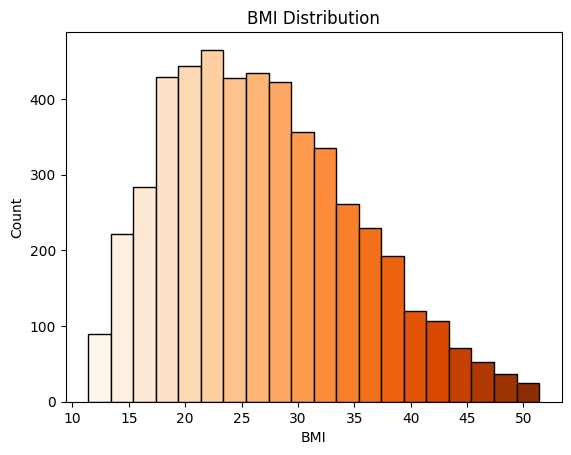

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data = df['bmi']
counts, bins, patches = plt.hist(data, bins=20, edgecolor='black')

# Color gradient: from light to dark orange
for i, patch in enumerate(patches):
    patch.set_facecolor(plt.cm.Oranges(i / len(patches)))

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()




**Insight:**

 Most individuals are *25–40 years old*, showing a younger adult population. Fewer older adults are present, which may influence lifestyle and health risk patterns.

### BMI Distribution | KDE Plot

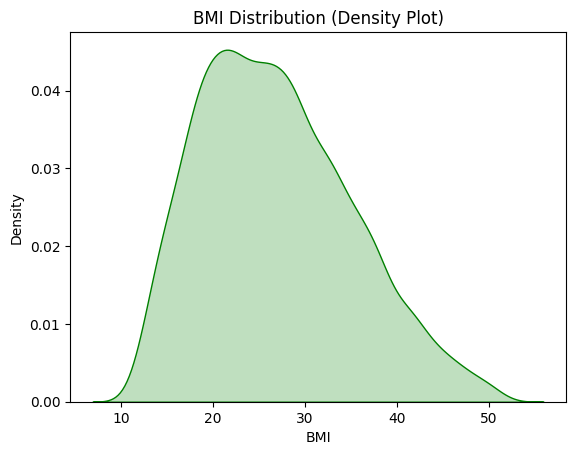

In [10]:
sns.kdeplot(df['bmi'], fill=True, color='green')
plt.title('BMI Distribution (Density Plot)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

**Insight:**

 Most individuals have a **BMI in the 18–28 range**, indicating a majority with **normal** or **slightly overweight** BMI.

  A few outliers suggest some underweight or obese individuals, highlighting variability in the population’s health and lifestyle patterns.

### Sleep Duration Distribution | Boxplot

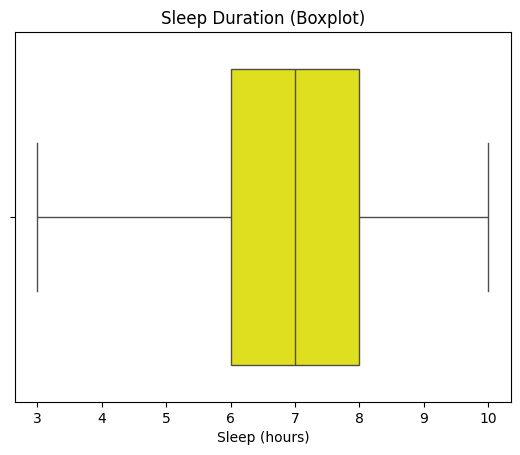

In [18]:
sns.boxplot(x=df['sleep'], color='yellow')
plt.title('Sleep Duration (Boxplot)')
plt.xlabel('Sleep (hours)')
plt.show()


Insight:

Most individuals sleep around **6–8 hours**, indicating *generally adequate sleep patterns*. A few outliers show **very low** **(<5 hours) or very high (>9 hours)** sleep, which may affect lifestyle and health risk.

### Exercise Frequency | Bar Plot

/tmp/ipython-input-1263830087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exercise', data=df, palette=colors)


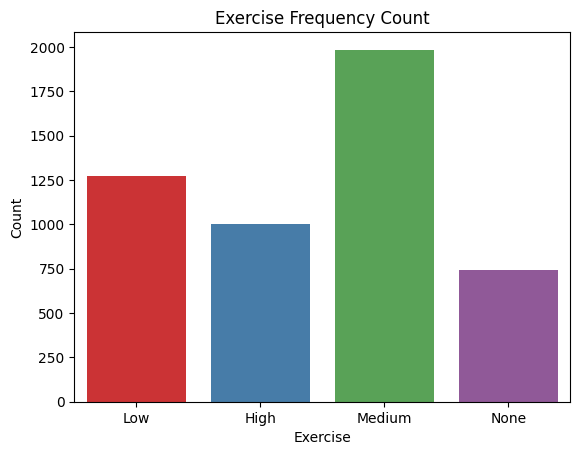

In [24]:
exercise_counts = df['exercise'].value_counts()
colors = sns.color_palette("Set1", len(exercise_counts))
sns.countplot(x='exercise', data=df, palette=colors)
plt.title('Exercise Frequency Count')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

Insight:

The majority of individuals engage in **moderate to low exercise**. Few participants report high-frequency exercise, suggesting that regular physical activity is limited for most of the population, which could influence BMI and overall lifestyle scores.

### Smoking Habits & Alcohol Consumption

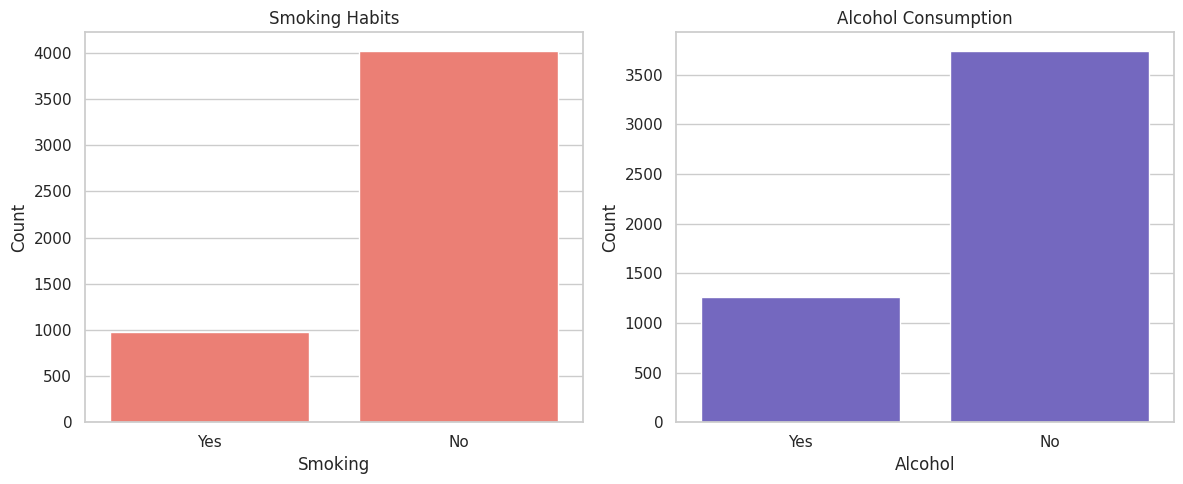

In [28]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

fig, axes = plt.subplots(1, 2)

# Smoking Habits
sns.countplot(x='smoking', data=df, ax=axes[0], color='#FF6F61')
axes[0].set_title('Smoking Habits')
axes[0].set_xlabel('Smoking')
axes[0].set_ylabel('Count')

# Alcohol Consumption
sns.countplot(x='alcohol', data=df, ax=axes[1], color='#6A5ACD')
axes[1].set_title('Alcohol Consumption')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Insight:**

Most individuals do not smoke and consume little or no alcohol, indicating generally healthy lifestyle habits.

A smaller portion of the population reports regular smoking or alcohol consumption, highlighting potential risk groups for lifestyle-related health issues.


### Lifestyle Score Distribution | Violin Plot

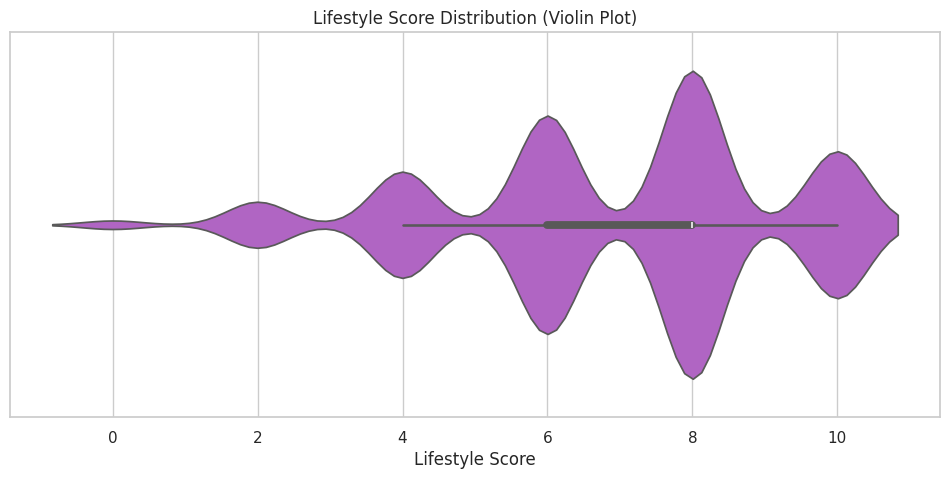

In [32]:
sns.violinplot(x=df['Lifestyle_score'], color='mediumorchid')
plt.title('Lifestyle Score Distribution (Violin Plot)')
plt.xlabel('Lifestyle Score')

plt.show()

**Insight**

Most individuals have a Lifestyle Score around **50–70**, indicating **moderate lifestyle habits**.

Few individuals have very low or very high scores, suggesting diverse lifestyle patterns in the population.





## 2. **Bivariate Analysis**

**Purpose**:

 Explore relationships between pairs of variables.

**Related Questions:**

1. BMI vs Health Risk → “Do people with higher BMI have higher health risk?”

2. Sleep vs Health Risk → “Do high-risk people sleep less?”

3. Exercise vs Health Risk → “Does exercising more lower health risk?”

4. Sugar Intake vs Health Risk → “Does eating more sugar increase health risk?”

5. Lifestyle Score vs Health Risk → “Which health risk group has the healthiest lifestyle?”



---


### BMI vs Health Risk | Boxplot







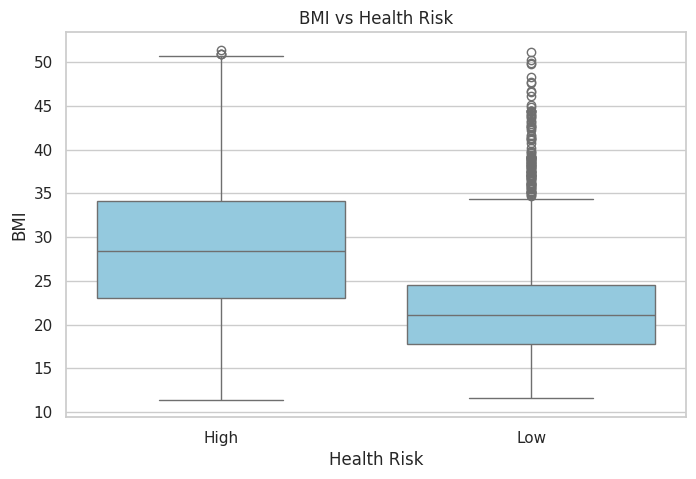

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='health_risk', y='bmi', data=df, color='skyblue')  # salmon color
plt.title('BMI vs Health Risk')
plt.xlabel('Health Risk')
plt.ylabel('BMI')
plt.show()


Insight:

High **health risk individuals** tend to have **higher BMI**, while Low risk individuals have lower BMI. BMI is a strong indicator of lifestyle-related health risk.

### Sleep vs Health Risk | Violin Plot

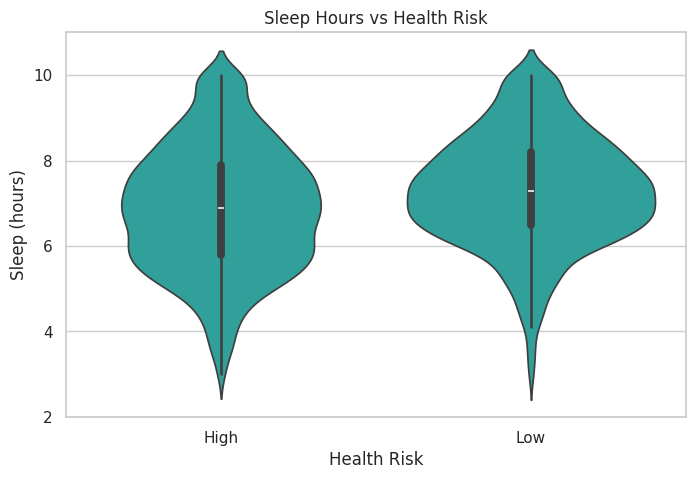

In [43]:
plt.figure(figsize=(8,5))
sns.violinplot(x='health_risk', y='sleep', data=df, color='#20B2AA')  # light sea green
plt.title('Sleep Hours vs Health Risk')
plt.xlabel('Health Risk')
plt.ylabel('Sleep (hours)')
plt.show()

Insight:

**High risk** individuals **sleep slightly less**, while Low and Medium risk groups have more consistent sleep patterns. Adequate sleep is linked to lower health risk.

### Exercise vs Health Risk | Stacked Bar Plot

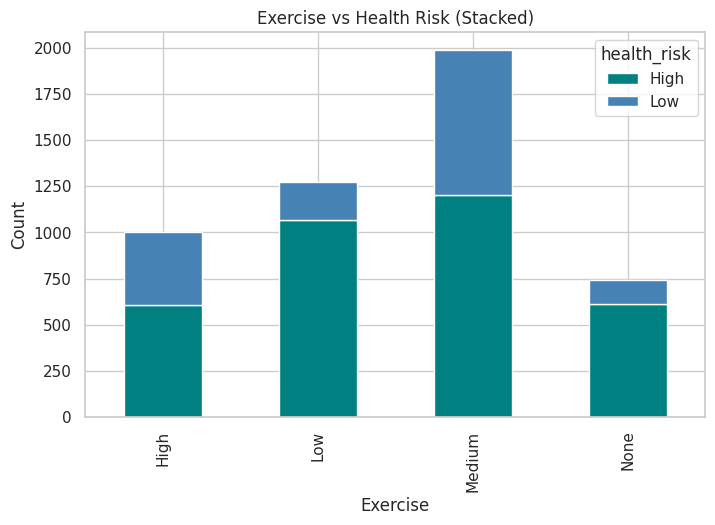

In [48]:
cross_tab_exercise = pd.crosstab(df['exercise'], df['health_risk'])

colors = ['#008080', '#4682B4', '#20B2AA']  # Dark Teal, Steel Blue, Light Teal

cross_tab_exercise.plot(kind='bar', stacked=True, color=colors, figsize=(8,5))
plt.title('Exercise vs Health Risk (Stacked)')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()


**Insights:**


Regular exercise is associated with Low health risk, while no/low exercise is linked to Medium and High risk. Exercise appears protective.

### Sugar Intake vs Health Risk | Stacked Bar Plot

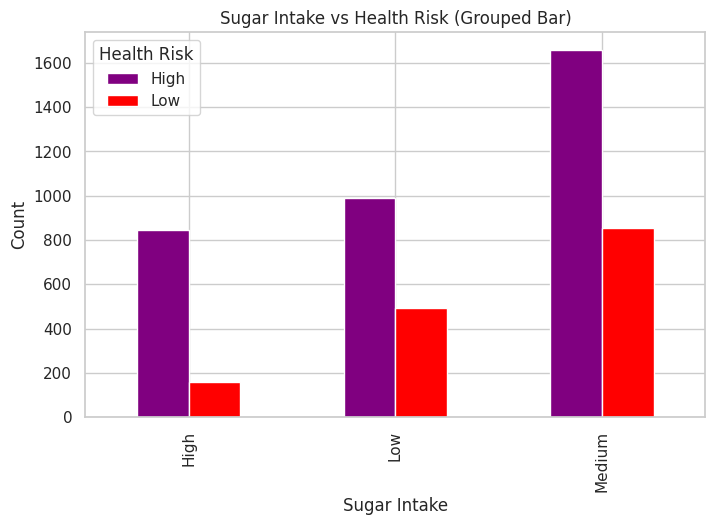

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Create cross-tab
cross_tab_sugar = pd.crosstab(df['sugar_intake'], df['health_risk'])

# Grouped bar plot with orange and yellow shades
colors = ['#800080', '#FF0000', '#C71585']  # Dark Orange, Gold, Light Orange

cross_tab_sugar.plot(kind='bar', stacked=False, color=colors, figsize=(8,5))
plt.title('Sugar Intake vs Health Risk (Grouped Bar)')
plt.xlabel('Sugar Intake')
plt.ylabel('Count')
plt.legend(title='Health Risk')
plt.show()


**Insight:**

Higher sugar intake is more common among Medium and High risk individuals, while Low risk individuals tend to consume less sugar.

### Lifestyle Score vs Health Risk | Boxplot

/tmp/ipython-input-2492789202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='health_risk', y='Lifestyle_score', data=df, palette=colors)


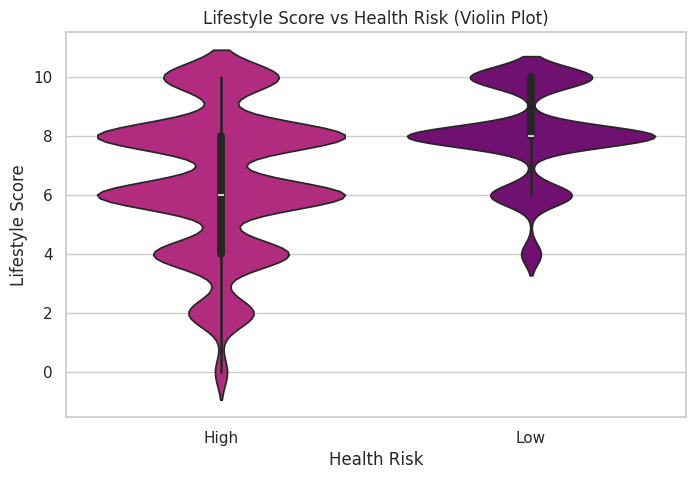

In [53]:
plt.figure(figsize=(8,5))

colors = {'Low':'#800080', 'Medium':'#FF0000', 'High':'#C71585'}

sns.violinplot(x='health_risk', y='Lifestyle_score', data=df, palette=colors)
plt.title('Lifestyle Score vs Health Risk (Violin Plot)')
plt.xlabel('Health Risk')
plt.ylabel('Lifestyle Score')
plt.show()

**Insight:**

Higher Lifestyle Scores are associated with Low health risk, while lower scores are linked to High health risk. Lifestyle score is a strong indicator of overall health.

## Multivariate Analysis

Purpose: Examine interactions among multiple variables to detect deeper patterns.

**Related Questions:**
1. “How do BMI, sleep, and lifestyle score jointly affect health risk?”

2. “Which combinations of age, BMI, and sleep hours are most common in high-risk individuals?”

3. “Do healthier lifestyle scores correlate with lower BMI and better sleep across different age groups?”

4. “Are there clusters of individuals with similar lifestyle patterns and health risk?”

5. “How does exercise or sugar intake interact with health risk and lifestyle score?”


---



### BMI vs Sleep | Scatterplot (Colored by Health Risk)

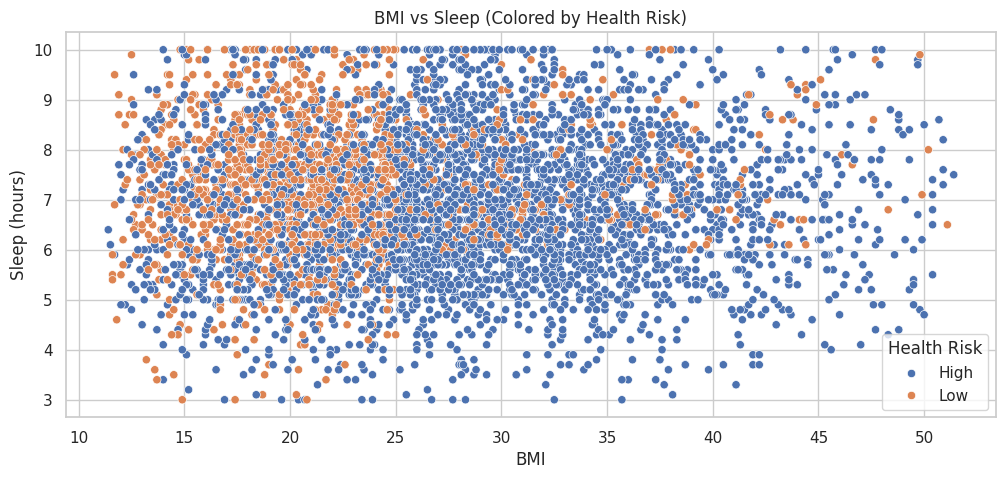

In [54]:
sns.scatterplot(x='bmi', y='sleep', hue='health_risk', data=df)
plt.title('BMI vs Sleep (Colored by Health Risk)')
plt.xlabel('BMI')
plt.ylabel('Sleep (hours)')
plt.legend(title='Health Risk')
plt.show()

**Insight:**

Individuals with higher BMI often have lower sleep hours, especially in high health risk category.

### Age vs BMI vs Lifestyle Score (Colored by Health Risk) | Bubble Plot

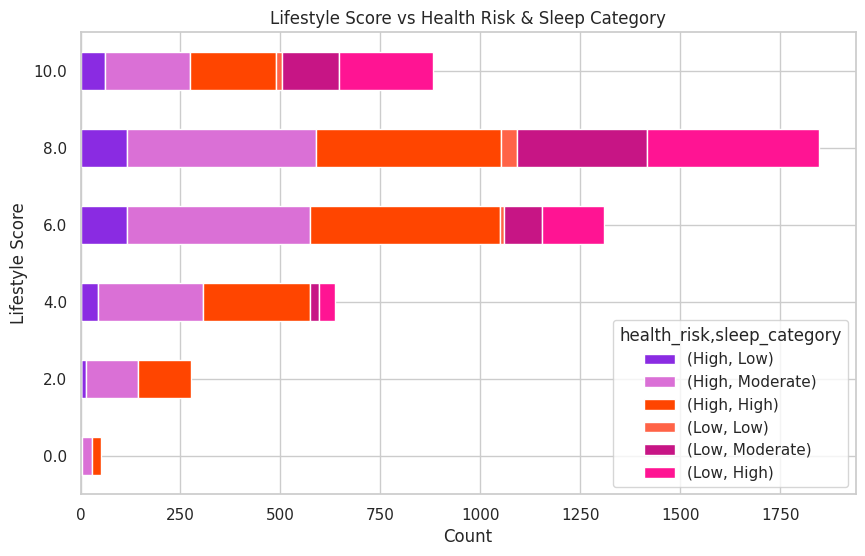

In [58]:

df['sleep_category'] = pd.cut(df['sleep'], bins=[0,5,7,10], labels=['Low','Moderate','High'])

# Cross-tab for grouped horizontal bar
cross_tab = pd.crosstab(df['Lifestyle_score'].round(), [df['health_risk'], df['sleep_category']])
# Define a custom color palette
colors = ['#8A2BE2', '#DA70D6', '#FF4500', '#FF6347', '#C71585', '#FF1493']  # Purple & Red shades

cross_tab.plot(kind='barh', stacked=True, figsize=(10,6), color=colors)
plt.title('Lifestyle Score vs Health Risk & Sleep Category')
plt.xlabel('Count')
plt.ylabel('Lifestyle Score')
plt.show()


**Insight:**

Splitting by exercise and health risk shows distinct clusters:

**Low exercise + high-risk** individuals have higher BMI and lower sleep.

**High exercise + low-risk** individuals cluster at moderate BMI and higher sleep.

###  Correlation of Numerical Features | Heatmap

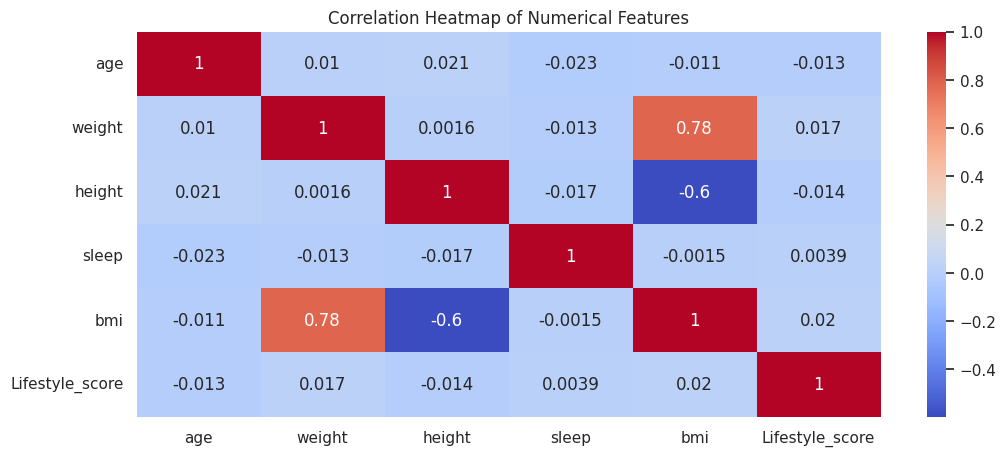

In [59]:
numeric_cols = ['age', 'weight', 'height', 'sleep', 'bmi', 'Lifestyle_score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Insight:**

BMI strongly correlates with weight. Lifestyle Score is negatively correlated with BMI and positively with sleep, indicating healthier habits reduce risk.

### Pairwise Relationships Between Key Variables | Pairplot

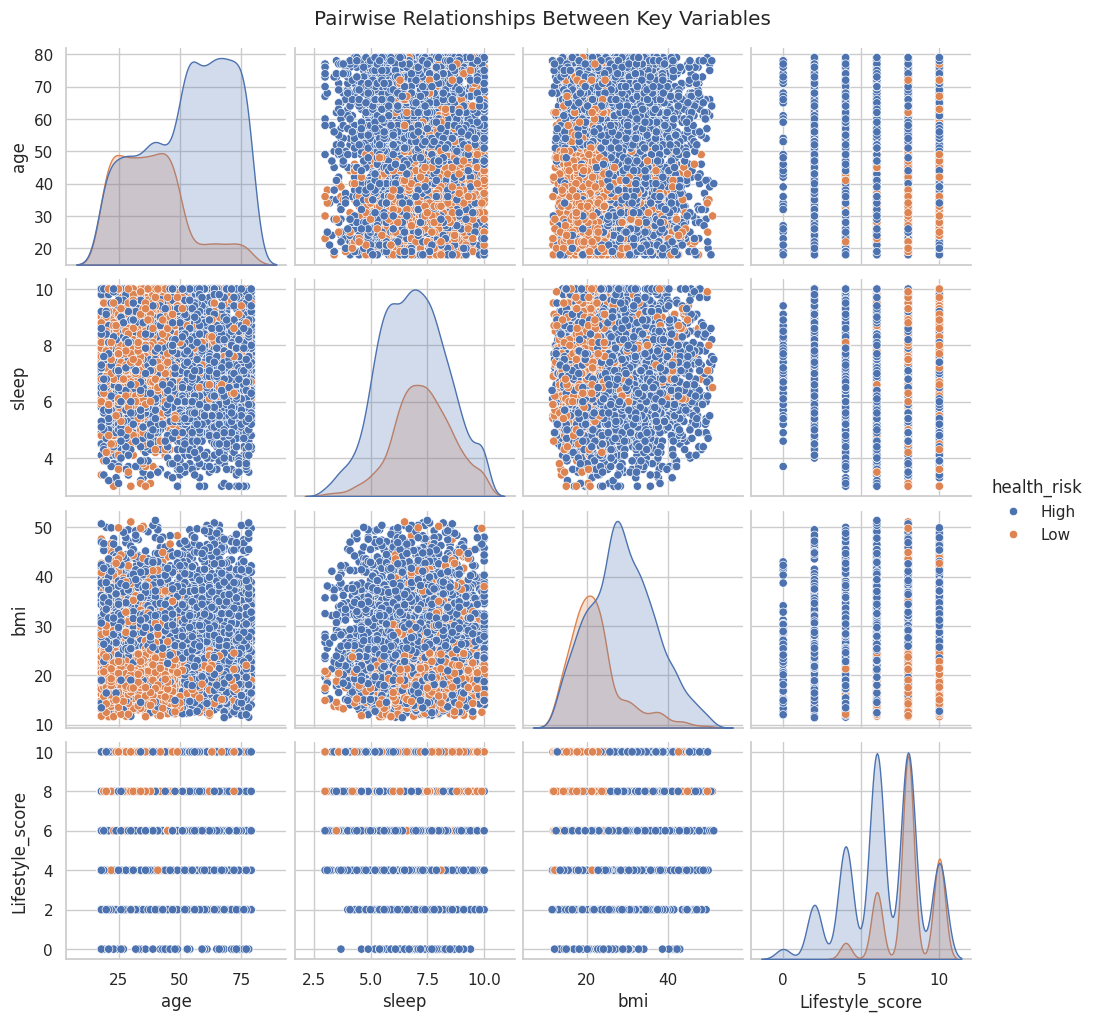

In [60]:
sns.pairplot(df[['age', 'sleep', 'bmi', 'Lifestyle_score', 'health_risk']], hue='health_risk')
plt.suptitle('Pairwise Relationships Between Key Variables', y=1.02)
plt.show()


**Insight:**

Patterns show clusters by health risk, e.g., high-risk individuals have higher BMI, lower Lifestyle Score, and less sleep.



# Conclusions

1. **BMI is a critical determinant of health risk.**

   - Individuals with higher BMI are more likely to fall into the High health risk category.

   - Maintaining BMI within the normal range is essential for overall health.

2. **Balanced sleep is important but uneven across the population.**

   - Most people fall into Low or Optimal sleep categories, while very few achieve High sleep durations.

   - Encouraging adequate sleep can improve wellness outcomes.

3. **Lifestyle habits significantly affect health risk.**

   - Exercise, sugar intake, smoking, and alcohol consumption collectively influence health.

   - Higher Lifestyle Scores are associated with healthier profiles and lower health risk.

4. **Profession-related patterns highlight targeted wellness opportunities.**

   - Certain professions show higher risk due to lifestyle habits (e.g., sedentary jobs or irregular schedules).

   - Tailored wellness programs can be developed for these groups.

5. **Preventive and informed lifestyle interventions are actionable.**

   - Reducing sugar intake, limiting smoking and alcohol, increasing exercise frequency, and maintaining a healthy BMI are actionable strategies.

   - Awareness programs and personalized recommendations can help individuals reduce their health risk.